In [48]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-secant-iqi)

Here we look for a root of $x+\cos(10x)$ that is close to 1.

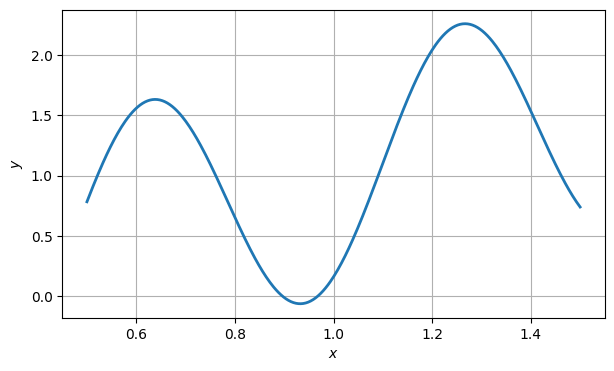

In [49]:
f = lambda x: x + cos(10 * x)
xx = linspace(0.5, 1.5, 400)
fig, ax = subplots()
ax.plot(xx, f(xx), label="function")
ax.grid()
xlabel("$x$");  ylabel("$y$");

We choose three values to get the iteration started.

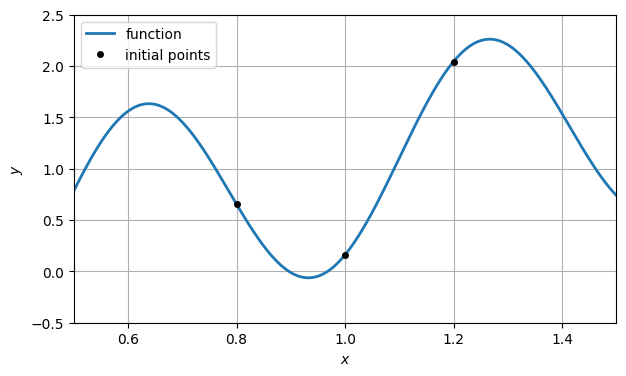

In [50]:
x = array([0.8, 1.2, 1])
y = f(x)
ax.plot(x, y, "ko", label="initial points")
ax.legend()
ax.axis([0.5, 1.5, -0.5, 2.5])
fig

If we were using forward interpolation, we would ask for the polynomial interpolant of $y$ as a function of $x$. But that parabola has no real roots.

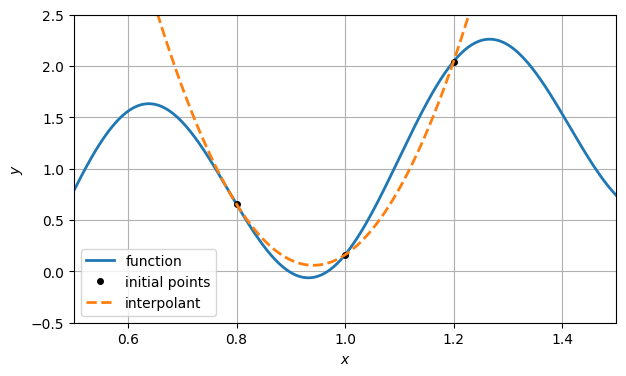

In [51]:
q = poly1d(polyfit(x, y, 2))  # interpolating polynomial
ax.plot(xx, q(xx), "--", label="interpolant") 
ax.legend()
fig

To do inverse interpolation, we swap the roles of $x$ and $y$ in the interpolation.

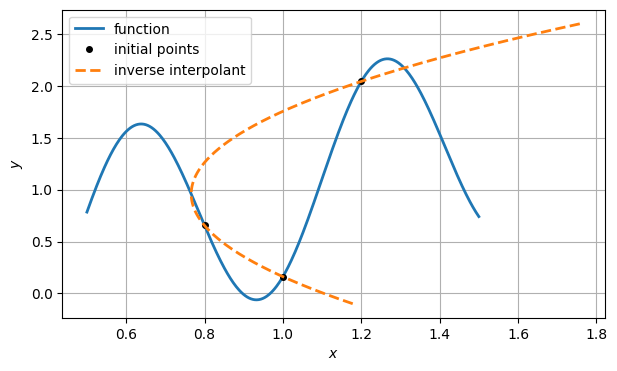

In [52]:
plot(xx, f(xx), label="function")
plot(x, y, "ko", label="initial points")

q = poly1d(polyfit(y, x, 2))  # inverse interpolating polynomial
yy = linspace(-0.1, 2.6, 400)
plot(q(yy), yy, "--", label="inverse interpolant")

grid(), xlabel("$x$"), ylabel("$y$")
legend();

We seek the value of $x$ that makes $y$ zero. This means evaluating $q$ at zero.

In [53]:
x = hstack([x, q(0)])
y = hstack([y, f(x[-1])])
print("x:", x, "\ny:", y)

x: [0.8        1.2        1.         1.10398139] 
y: [0.65449997 2.04385396 0.16092847 1.14820652]


We repeat the process a few more times.

In [54]:
for k in range(6):
    q = poly1d(polyfit(y[-3:], x[-3:], 2))
    x = hstack([x, q(0)])
    y = hstack([y, f(x[-1])])
print(f"final residual is {y[-1]:.2e}")

final residual is 1.53e-14


Here is the sequence of errors.

In [55]:
from scipy.optimize import root_scalar
r = root_scalar(f, bracket=[0.9, 1]).root
err = x - r
print(err)

[-1.67888402e-01  2.32111598e-01  3.21115982e-02  1.36092984e-01
  1.53473435e-02  3.26831473e-03  4.61743614e-04  6.29584770e-06
  3.43903683e-09  6.39488462e-14]


The error seems to be superlinear, but subquadratic:

In [56]:
logerr = log(abs(err))
for i in range(len(err) - 1):
    print(logerr[i+1] / logerr[i])

0.818477543986624
2.354297090262193
0.5800188694773638
2.0942526256501797
1.3702985897217315
1.341928284536791
1.5592238835564955
1.6273123235711273
1.5589376504302388
